In [13]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
#%matplotlib notebook
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Glosario
# * Convertir: el objetivo de mostrar publicidad es que un dispositivo instale una aplicación,
# a ese evento se le llama conversión.
# *Dispositivo: ​ entidad con un id de publicidad asociado. Por ejemplo: un celular Samsung
#J6 con Android tiene un ​ id único , ​ un Apple iPhone tiene un ​ identificador único . ​
# * Evento: cualquier tipo de acción categorizada dentro de una aplicación. ​ Por ejemplo, en
#una aplicación de e-commerce un ​ funnel de eventos ​ muy común puede ser del estilo
#“abrir_app” → “buscar_producto” → “revisar_catalogo” → “agregar_a_carrito” →
#“efectuar_compra”. Cada uno de estos pasos es un ​ evento ​ .
#* Subasta: en el momento que una aplicación quiere mostrar una publicidad, ese espacio
#se vende en una subasta (generalmente de segundo precio) donde todos los
#interesados en mostrar una publicidad ofertan un precio y gana quién más ofrece.

#funnel de eventos: secuencia de eventos

In [2]:
auctions = pd.read_csv('../data2/auctions.csv.gzip',compression='gzip', dtype='object')

In [3]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    object
country            object
date               object
device_id          object
platform           object
ref_type_id        object
source_id          object
dtypes: object(7)
memory usage: 1.0+ GB


In [4]:
# vemos que las subastas tiene un país(donde se produjo la subasta?), una fecha, un device_id(?), platform(?)
# e identificadores de auction_type > existen diferentes tipos de subastas
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [10]:
# Vemos paises llevan a cabo subastas
auctions.groupby(['country']).count()

,auction_type_id,date,device_id,platform,ref_type_id,source_id
country,,,,,,
6333597102633388268,0,19571319,19571319,19571319,19571319,19571319


## :. Sólo existe un país en donde se realizan las subastas

## Clicks


advertiser_id: id de anunciante, cliente de Jampp que paga por el anuncio.<br>
action_id: id de acción.<br>
source_id: ID interna para la fuente (intercambio) desde la cual se originó el click.<br>
created: tiempo en el cual se produjo el click.<br>
latitude,longitude: ubicación de donde se produjo el click.<br>
carrier_id: Id para el operador de telefonía móvil del dispositivo.<br>
trans_id: Id de transacción(valor interno).<br>
os_minor: mínima version del OS.<br>
os_major: máxima versión del OS.<br>
agent_device : Agente para el dispositivo en el que se realizó el clic (modelo).<br>
specs_brand: especificaciones del dispositvo<br>
brand: marca del dispositivo<br>
timeToClick: tiempo de click<br>
touchX: posición en x del click<br>
touchY: posición en y del click<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: id del ref_type

In [14]:
clicks = pd.read_csv('../data2/clicks.csv.gzip',compression='gzip', dtype='object')

In [16]:
# Vemos un poco que campos conforman el df clicks
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [56]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null object
action_id          0 non-null object
source_id          26351 non-null object
created            26351 non-null object
country_code       26351 non-null object
latitude           26351 non-null object
longitude          26351 non-null object
wifi_connection    26351 non-null bool
carrier_id         26340 non-null object
trans_id           26351 non-null object
os_minor           26339 non-null object
agent_device       3243 non-null object
os_major           26339 non-null object
specs_brand        26351 non-null object
brand              6235 non-null object
timeToClick        22977 non-null object
touchX             23011 non-null object
touchY             23011 non-null object
ref_type           26351 non-null object
ref_hash           26351 non-null object
dtypes: bool(1), object(19)
memory usage: 3.8+ MB


### Todos los valores son strings

In [17]:
clicks.describe()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351,0.0,26351,26351,26351,26351,26351,26351,26340,26351,26339,3243,26339,26351,6235,22977,23011,23011,26351,26351
unique,7,0.0,11,26347,1,78,81,1,55,26351,28,190,12,5,13,17294,1001,3914,4,17119
top,3,NaN,0,2019-03-07T23:24:46.085Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,4.0,TNjkRJ46OCJKJIl62JxAYHdj4jHw8to,3.3786399484966047e+18,3.5168117921816156e+18,3.072849339937028e+18,392184377613098015,2.0,0.261,0.996,0.000,1891515180541284343,4063522808706112974
freq,26263,NaN,17009,2,26351,22949,22949,26351,4569,1,6922,656,7430,16172,2027,11,204,193,25549,41


## Cuántos anunciantes existen?

In [80]:
print("Anunciantes: "+str(clicks['advertiser_id'].describe()[0]))

Anunciantes: 26351


In [77]:
#wifi_connection vemos si existen valores null
clicks['wifi_connection'].notnull().count() == clicks['wifi_connection'].count()
# no existen valores nulos en la tabla

clicks[clicks['wifi_connection'] == False].count()
#clicks['wifi_connection'] == True

# Todas las conexiones son por wifi

advertiser_id      0
action_id          0
source_id          0
created            0
country_code       0
latitude           0
longitude          0
wifi_connection    0
carrier_id         0
trans_id           0
os_minor           0
agent_device       0
os_major           0
specs_brand        0
brand              0
timeToClick        0
touchX             0
touchY             0
ref_type           0
ref_hash           0
dtype: int64

### :. Todas las conexiones son por wifi

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,True,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [94]:
#agent_device
print("agent_device count:"+str(clicks['agent_device'].count()))
print("agent_device null count: "+str(clicks[clicks['agent_device'].isnull()].count()))

#agent_device tiene muchos valores en null

agent_device count:3243
agent_device null count: advertiser_id      23108
action_id              0
source_id          23108
created            23108
country_code       23108
latitude           23108
longitude          23108
wifi_connection    23108
carrier_id         23097
trans_id           23108
os_minor           23097
agent_device           0
os_major           23097
specs_brand        23108
brand               5633
timeToClick        20369
touchX             20369
touchY             20369
ref_type           23108
ref_hash           23108
dtype: int64


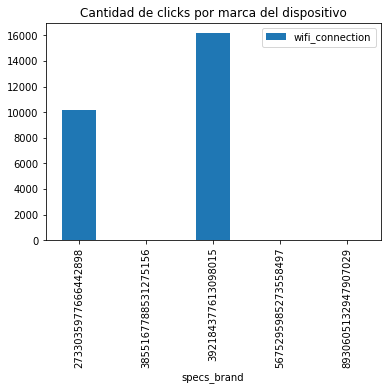

In [142]:
# brand y spec_brand
clicks[clicks['brand'].isnull()].count()
# brand tiene muchos valores nulos
specs_count = clicks.groupby(['specs_brand']).sum()
specs_count.rename(index=str,columns={"wifi_connection": "cantidad brand"})

specs_count.plot.bar(title="Cantidad de clicks por marca del dispositivo")
# Cuáles son los dispositivos por clicks más usados
#auctions['date'].dt.day.value_counts().sort_values().plot.bar(title="Subastas por dia")

In [128]:
print("cantidad de ref_type: "+str(clicks['ref_type'].count()))

print("cantidad de ref_type NULL: "+str(clicks[clicks['ref_type'].isnull()].count()['ref_type']))

cantidad de ref_type: 26351
cantidad de ref_type NULL: 0


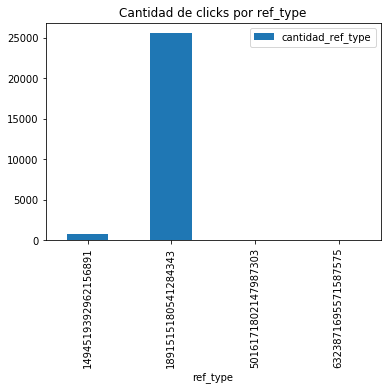

In [155]:
#tipos de ref_type
#clicks.groupby(['ref_type']).sum()#.columns('test').plot.bar(title='ref_type suma')
#clicks.groupby(['ref_type']).sum()#.columns('test').plot.bar(title='ref_type suma')
clicks.rename(index=str, columns={"wifi_connection": "cantidad_ref_type"}).groupby(['ref_type'])\
.sum().plot.bar(title="Cantidad de clicks por ref_type")

#Ref_type más usados sacando el más usado
#clicks.rename(index=str, columns={"wifi_connection": "cantidad_ref_type"}).groupby(['ref_type'])\
#.sum().sort_values(by='cantidad_ref_type',ascending=False)

# Events

In [ ]:
# Qué tipo de eventos existen ?

## Installs

## Target competencia